In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [53]:
import numpy as np
import pandas as pd

In [84]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [85]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)

In [86]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [116]:
# we taking only 2 column becouse of making decision boundary

x = df.iloc[:,1:3]
y  = df['diagnosis']

In [117]:
x

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [114]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler()

In [115]:
le = LabelEncoder()

In [118]:
y = le.fit_transform(y)

In [119]:
x = scaler.fit_transform(x)

In [121]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [95]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [63]:
x_train.shape

(455, 30)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [123]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [125]:
y_pred = knn.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.868421052631579


# Decision Boundary

### step 2. create a meshgrid

In [127]:
x = np.linspace(-40,40,100)
y = np.linspace(-50,50,90)

xx, yy = np.meshgrid(x,y)

print(xx, yy)

[[-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 [-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 [-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 ...
 [-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 [-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]
 [-40.         -39.19191919 -38.38383838 ...  38.38383838  39.19191919
   40.        ]] [[-50.         -50.         -50.         ... -50.         -50.
  -50.        ]
 [-48.87640449 -48.87640449 -48.87640449 ... -48.87640449 -48.87640449
  -48.87640449]
 [-47.75280899 -47.75280899 -47.75280899 ... -47.75280899 -47.75280899
  -47.75280899]
 ...
 [ 47.75280899  47.75280899  47.75280899 ...  47.75280899  47.75280899
   47.75280899]
 [ 48.87640449  48.87640449  48.87640449 ...  48.87640449  48.87640449
   48.87640449]
 [ 50.          50.          50.        

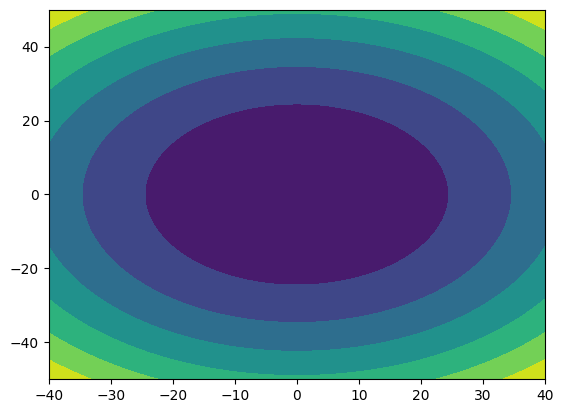

In [128]:
z = (xx**2) + (yy**2)

import matplotlib.pyplot as plt
plt.contourf(xx,yy,z)

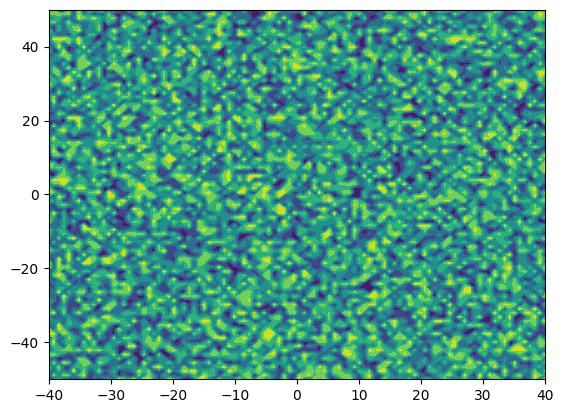

In [78]:
z = np.random.random((90,100))

import matplotlib.pyplot as plt
plt.contourf(xx,yy,z)

In [129]:
a = np.arange(start=x_train[:,0].min(),stop=x_train[:,0].max(),step=0.01)

In [130]:
b = np.arange(start=x_train[:,1].min(),stop=x_train[:,1].max(),step=0.01)

In [131]:
xx, yy = np.meshgrid(a,b)

In [104]:
yy.shape

(689, 601)

In [103]:
xx.shape

(689, 601)

### step 3. classifiying every point on the meshgrid

In [132]:
input_array = np.array([xx.ravel(),yy.ravel()]).T

labels = knn.predict(input_array)

In [133]:
labels

array(['B', 'B', 'B', ..., 'M', 'M', 'M'], dtype=object)

In [135]:
print(labels.dtype)   # It should be int or float
print(labels.shape)   # It should match xx.shape when reshaped


object
(414089,)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

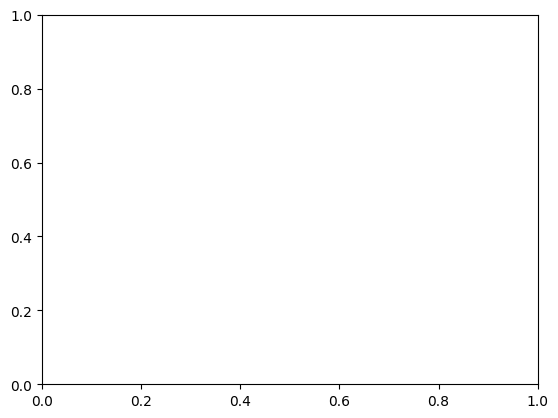

In [134]:
plt.contourf(xx,yy,labels.reshape(xx.shape))

# Code form scratch

In [51]:
class knn:

    def __init__(self,k=5):
        self.n_neighbors=k
        self.x_train= None
        self.y_train = None

    def fit(self,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict (self,x_test):

        for i in x_test:
            distance = []
            for j in self.x_train:
                distance.append(self.calculate_dist(i, j))

            # Pair distances with corresponding training labels
            neighbors = sorted(list(enumerate(distance)), key=lambda x: x[1])[:self.n_neighbors]

            # Get the labels of the k nearest neighbors
            neighbor_labels = [self.y_train[idx] for idx, _ in neighbors]

            # Majority vote
            most_common = Counter(neighbor_labels).most_common(1)[0][0]
            predictions.append(most_common)

        return np.array(predictions)

    def calculate_dist(self,i,j):
        return np.linalg.norm(i-j)

In [47]:
kn = knn(k=5)

In [48]:
kn.fit(x_train,y_train)

In [49]:
kn.predict(x_test)

KeyError: 84